In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
common_companies = pd.read_csv("../ImportantCSVs/common_companies.csv", encoding = "utf8")

In [3]:
common_companies.head()

,Unnamed: 0,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,...,EducationFlag,DegreeType,EliteFlag,Dummy1,Dummy2,Dummy3,Dummy4,Layoff Date,Company Name,Employees Affected
0,0,808a3ae7-b1ec-31f0-9335-8f49e4e10a40,1988,0,Web Development,0.919146,Software Engineering,0.068156,Los Angeles,United States,...,False,NaN,False,NaN,NaN,BBG000BH2JM1,1.538810e+12,2/1/2017,Symantec Corporation,87
1,0,1fe596b8-87d0-3118-ab5e-375485b477e9,1984,0,Mobile Telecommunications,0.571192,Business Development,0.260968,Mountain View,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.529320e+12,7/22/2015,"Cisco Systems, Inc.",192
2,0,43d4f687-4de8-39e0-91f4-ed90ba1e2862,1967,2,Education,0.264015,Recruiting,0.205493,San Francisco,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.538820e+12,10/10/2014,"Cisco Systems, Inc.",1005
3,0,6870e27a-1eb0-3be6-8878-43b3adc611cc,1964,0,Web Design,0.428620,Digital Marketing,0.313889,San Jose,United States,...,False,NaN,False,NaN,NaN,BBG000BH2JM1,1.538900e+12,6/10/2016,Symantec Corporation,15
4,0,8da0eaa5-8d1a-3360-986d-4ab1f5658930,1992,2,Software Engineering,0.704756,Web Development,0.284496,New York,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.538840e+12,7/22/2015,"Cisco Systems, Inc.",192


In [4]:
common_companies.shape

(8040, 37)

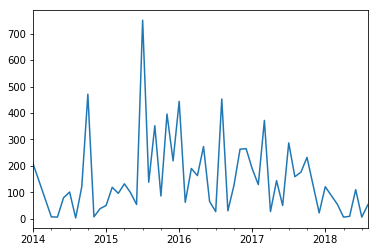

In [5]:
# Time Series analysis, y-value is the # of candidates being laid off in a particular month from 2014-01 to 2018-08
ts = common_companies['Layoff Date']
ts = pd.to_datetime(ts).dt.to_period('M').sort_values()

pd.value_counts(ts).sort_index().plot.line()

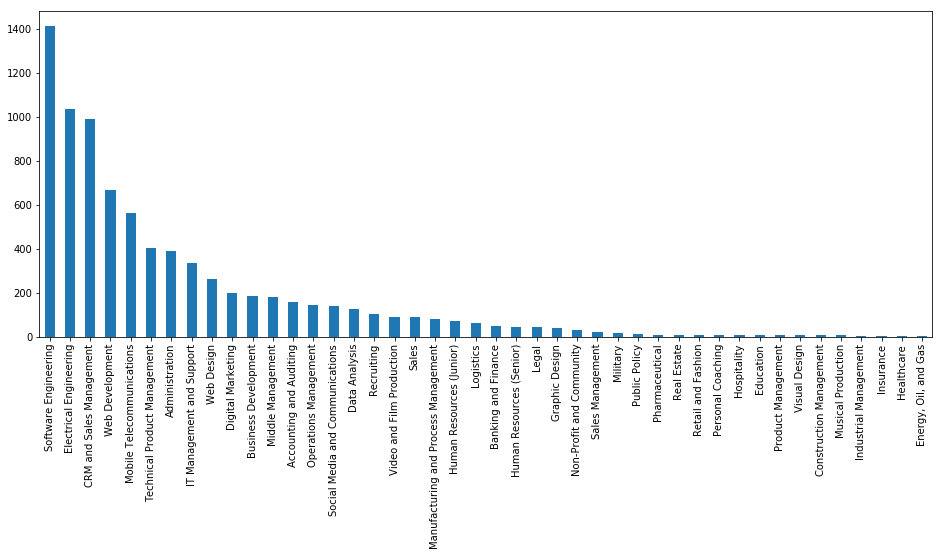

In [6]:
# Counts of skillsets out of 8040 observations
pd.value_counts(common_companies['Skillset1']).plot.bar(figsize = (16,6))

In [7]:
skills_count = pd.value_counts(common_companies['Skillset1']).to_frame()
skills_count.rename(columns={'Skillset1': 'count'}, inplace=True)
skills_count['Rank'] = range(1,len(skills_count)+1)
skills_count['Cumulative Probability'] = np.cumsum(skills_count['count'])/np.sum(skills_count['count'])
skills_count.head(30)

,count,Rank,Cumulative Probability
Software Engineering,1411,1,0.175498
Electrical Engineering,1033,2,0.303980
CRM and Sales Management,990,3,0.427114
Web Development,669,4,0.510323
Mobile Telecommunications,563,5,0.580348
Technical Product Management,405,6,0.630721
Administration,392,7,0.679478
IT Management and Support,334,8,0.721020
Web Design,264,9,0.753856
Digital Marketing,201,10,0.778856


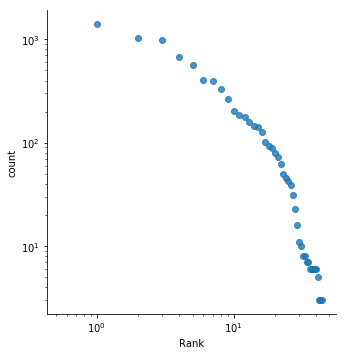

In [8]:
ax = sns.lmplot(x='Rank', y='count', data=skills_count, fit_reg=False)
ax.set(xscale="log", yscale="log")


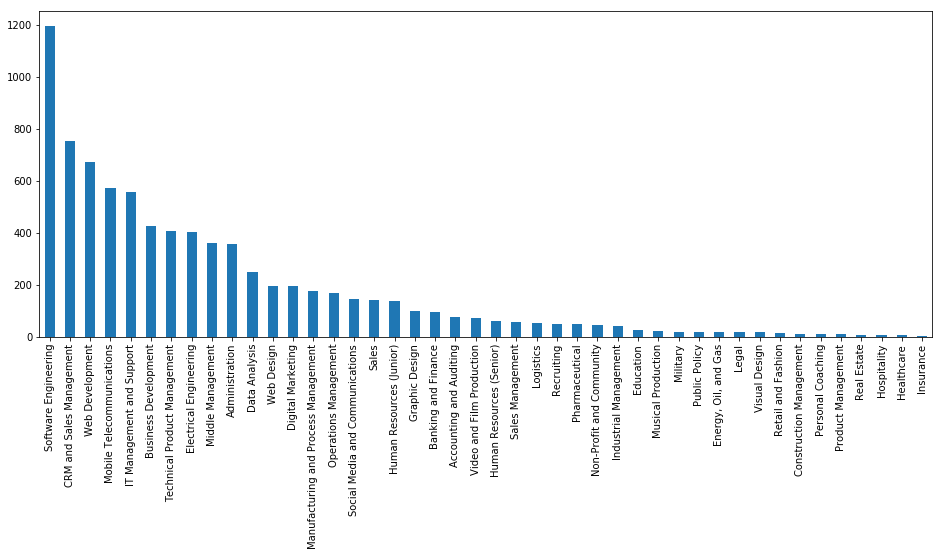

In [9]:
#Skill set 2
pd.value_counts(common_companies['Skillset2']).plot.bar(figsize = (16,6))

In [10]:
# Department Information
dept_count = pd.value_counts(common_companies['Dept']).to_frame()
dept_count.rename(columns={'Dept': 'count'}, inplace=True)
dept_count['Rank'] = range(1,len(dept_count)+1)
dept_count['Cumulative Probability'] = np.cumsum(dept_count['count'])/np.sum(dept_count['count'])
dept_count.head(30)

,count,Rank,Cumulative Probability
TECHNOLOGY,2107,1,0.385122
MARKETING,685,2,0.510327
BUSINESS,277,3,0.560958
PRODUCTION,218,4,0.600804
OPERATIONS,202,5,0.637726
OVERSIGHT,166,6,0.668068
ACCOUNTING,161,7,0.697496
HR,140,8,0.723085
"MARKETING,TECHNOLOGY",137,9,0.748126
"TECHNOLOGY,OVERSIGHT",79,10,0.762566


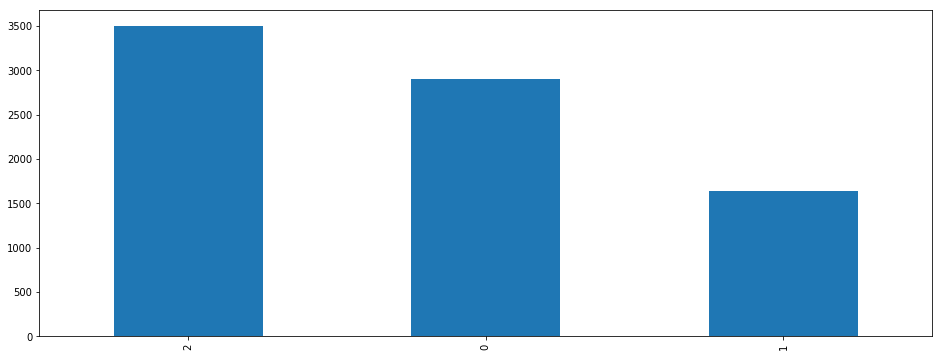

In [11]:
# Gender Distribution (1: female; 2: male; 0: unknown)
pd.value_counts(common_companies['Gender Flag']).plot.bar(figsize = (16,6))

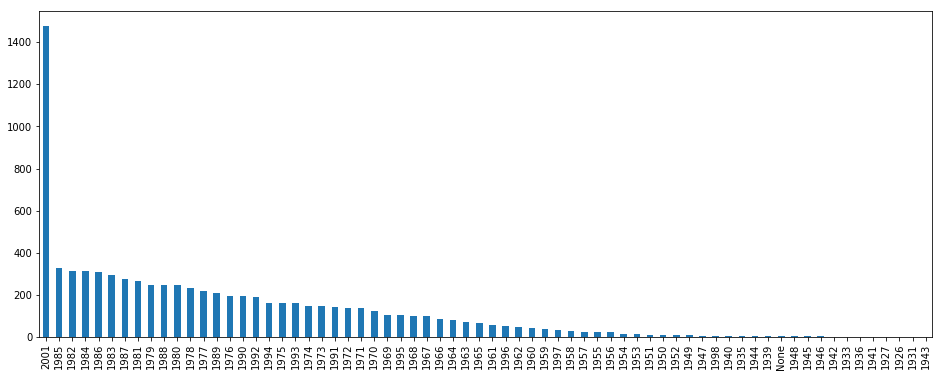

In [12]:
# Birth Year Distribution
pd.value_counts(common_companies['Birth Year']).plot.bar(figsize = (16,6))

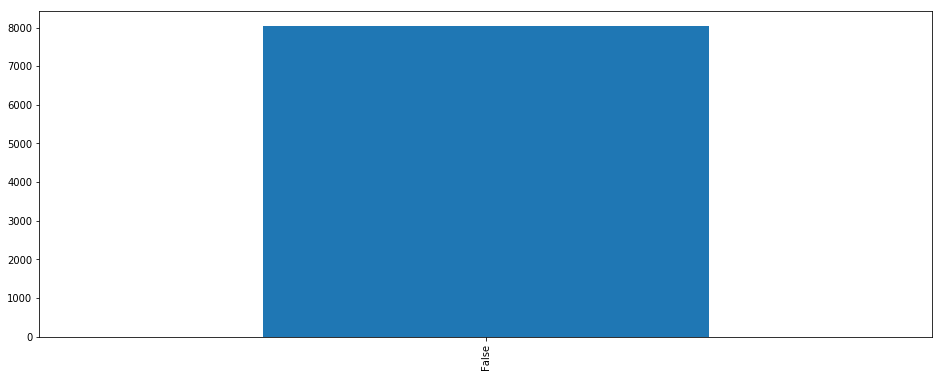

In [13]:
# Whether currently employed or not
pd.value_counts(common_companies['CurrentEmployFlag']).plot.bar(figsize = (16,6))

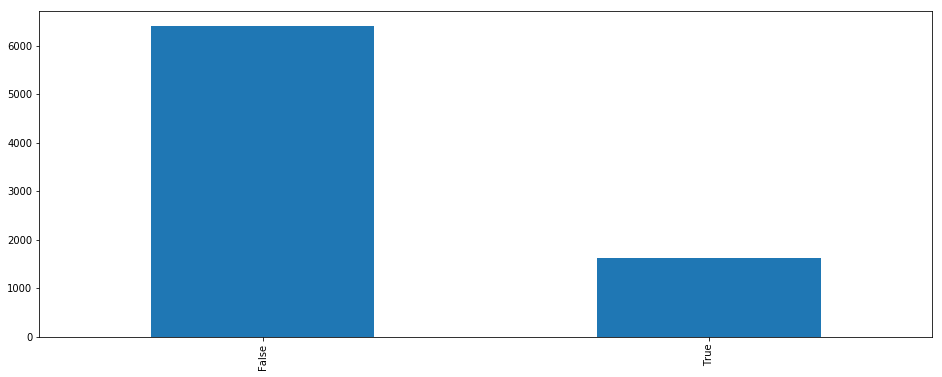

In [14]:
# Whether from an elite institution or not
pd.value_counts(common_companies['Elite Institution']).plot.bar(figsize = (16,6))

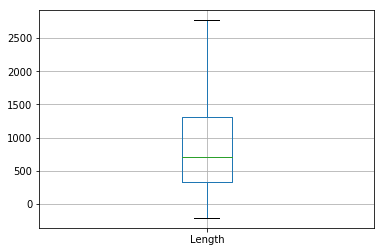

In [15]:
# Boxplot of each stay in units of days
common_companies.boxplot(column = 'Length', showfliers=False)